In [2]:
# libraries Required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

In [3]:
data_train=pd.read_csv("C:/Users/Vikash Singh/Desktop/avance assignment/Train_Retail.csv")
data_test=pd.read_csv("C:/Users/Vikash Singh/Desktop/avance assignment/Test_Retail.csv")

In [4]:
target = data_train['Item_Outlet_Sales']
data_train=data_train.drop(['Item_Outlet_Sales'],axis=1)

In [5]:
data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


In [6]:
data_train.shape,data_test.shape

((8523, 11), (5681, 11))

#### missing value analysis

In [7]:
missing_val_t=pd.DataFrame(data_train.isnull().sum())
missing_val_v=pd.DataFrame(data_test.isnull().sum())

In [8]:
missing_val_t,missing_val_v

(                              0
 Item_Identifier               0
 Item_Weight                1463
 Item_Fat_Content              0
 Item_Visibility               0
 Item_Type                     0
 Item_MRP                      0
 Outlet_Identifier             0
 Outlet_Establishment_Year     0
 Outlet_Size                2410
 Outlet_Location_Type          0
 Outlet_Type                   0,                               0
 Item_Identifier               0
 Item_Weight                 976
 Item_Fat_Content              0
 Item_Visibility               0
 Item_Type                     0
 Item_MRP                      0
 Outlet_Identifier             0
 Outlet_Establishment_Year     0
 Outlet_Size                1606
 Outlet_Location_Type          0
 Outlet_Type                   0)

### encoding the data variables

In [9]:
data_train['Item_Identifier'].replace(('FD', 'DR', 'NC'), (1,2,3), inplace=True)
data_test['Item_Identifier'].replace(('FD', 'DR', 'NC'), (1,2,3), inplace=True)


In [10]:
data_train['Outlet_Size'].replace(('High', 'Medium', 'Small'), (3,2,1), inplace=True)
data_train['Outlet_Location_Type'].replace(('Tier 3', 'Tier 2', 'Tier 1'), (3,2,1), inplace=True)
data_test['Outlet_Size'].replace(('High', 'Medium', 'Small'), (3,2,1), inplace=True)
data_test['Outlet_Location_Type'].replace(('Tier 3', 'Tier 2', 'Tier 1'), (3,2,1), inplace=True)

In [11]:
def mean_encode(data):
    if data <= 0.1:
        return 1
    if data <= 0.2 and data > 0.1:
        return 2
    if data <= 0.3 and data > 0.2:
        return 3
    if data <= 0.4 and data > 0.3:
        return 4
    
data_train['Item_Visibility'] = data_train['Item_Visibility'].apply(lambda x : mean_encode(x))
data_test['Item_Visibility'] = data_test['Item_Visibility'].apply(lambda x : mean_encode(x))

In [12]:
items = data_train['Item_Type'].value_counts().index

encoding_values = range(len(items))

data_train['Item_Type'].replace(items, encoding_values, inplace=True)

items = data_test['Item_Type'].value_counts().index

encoding_values = range(len(items))

data_test['Item_Type'].replace(items, encoding_values, inplace=True)

In [13]:
outlets = data_train['Outlet_Identifier'].value_counts().index

enc_outlets = range(len(outlets))

data_train['Outlet_Identifier'].replace(outlets, enc_outlets, inplace=True)

outlets = data_test['Outlet_Identifier'].value_counts().index

enc_outlets = range(len(outlets))

data_test['Outlet_Identifier'].replace(outlets, enc_outlets, inplace=True)

In [14]:
years = data_train['Outlet_Establishment_Year'].value_counts().index.sort_values()

enc_years = range(len(years))

data_train['Outlet_Establishment_Year'].replace(years, enc_years, inplace=True)

years = data_test['Outlet_Establishment_Year'].value_counts().index.sort_values()

enc_years = range(len(years))

data_test['Outlet_Establishment_Year'].replace(years, enc_years, inplace=True)



In [15]:
data_train['Outlet_Type'].replace('Supermarket Type3',3, inplace=True)
data_train['Outlet_Type'].replace('Supermarket Type2',2, inplace=True)
data_train['Outlet_Type'].replace('Supermarket Type1',1, inplace=True)
data_train['Outlet_Type'].replace('Grocery Store',0, inplace=True)

data_test['Outlet_Type'].replace('Supermarket Type3',3, inplace=True)
data_test['Outlet_Type'].replace('Supermarket Type2',2, inplace=True)
data_test['Outlet_Type'].replace('Supermarket Type1',1, inplace=True)
data_test['Outlet_Type'].replace('Grocery Store',0, inplace=True)

In [16]:
data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.30,Low Fat,1,4,249.8092,4,4,2.0,1,1
1,DRC01,5.92,Regular,1,8,48.2692,6,8,2.0,3,2
2,FDN15,17.50,Low Fat,1,9,141.6180,4,4,2.0,1,1
3,FDX07,19.20,Regular,1,0,182.0950,8,3,NaN,3,0
4,NCD19,8.93,Low Fat,1,2,53.8614,1,1,3.0,3,1


In [17]:
data_train['Item_Identifier'] = data_train['Item_Identifier'].apply(lambda x : x[:2])
data_train['Item_Identifier'].replace(('FD', 'DR', 'NC'), (1,2,3), inplace=True)
data_test['Item_Identifier'] = data_test['Item_Identifier'].apply(lambda x : x[:2])
data_test['Item_Identifier'].replace(('FD', 'DR', 'NC'), (1,2,3), inplace=True)

In [18]:

data_train['Item_Fat_Content'] = data_train['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})

data_test['Item_Fat_Content'] = data_test['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})

In [19]:
data_test['Item_Fat_Content'].replace(('Low Fat', 'Regular'), (0, 1), inplace=True)
data_train['Item_Fat_Content'].replace(('Low Fat', 'Regular'), (0, 1), inplace=True)

In [20]:
data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1,9.30,0,1,4,249.8092,4,4,2.0,1,1
1,2,5.92,1,1,8,48.2692,6,8,2.0,3,2
2,1,17.50,0,1,9,141.6180,4,4,2.0,1,1
3,1,19.20,1,1,0,182.0950,8,3,NaN,3,0
4,3,8.93,0,1,2,53.8614,1,1,3.0,3,1


#### missing value treatment

In [21]:
#treating missing values
data_train.Outlet_Size.fillna(data_train.Outlet_Size.median(),inplace=True)
data_test.Outlet_Size.fillna(data_test.Outlet_Size.median(),inplace=True)

In [22]:
#treating missing values
data_train.Item_Weight.fillna(data_train.Item_Weight.median(),inplace=True)#treating missing values
data_test.Item_Weight.fillna(data_test.Item_Weight.median(),inplace=True)

In [23]:
missing_val_t=pd.DataFrame(data_train.isnull().sum())
missing_val_v=pd.DataFrame(data_test.isnull().sum())
missing_val_t,missing_val_v

(                           0
 Item_Identifier            0
 Item_Weight                0
 Item_Fat_Content           0
 Item_Visibility            0
 Item_Type                  0
 Item_MRP                   0
 Outlet_Identifier          0
 Outlet_Establishment_Year  0
 Outlet_Size                0
 Outlet_Location_Type       0
 Outlet_Type                0,                            0
 Item_Identifier            0
 Item_Weight                0
 Item_Fat_Content           0
 Item_Visibility            0
 Item_Type                  0
 Item_MRP                   0
 Outlet_Identifier          0
 Outlet_Establishment_Year  0
 Outlet_Size                0
 Outlet_Location_Type       0
 Outlet_Type                0)

Text(0.5, 1.0, 'Pearson Correlation')

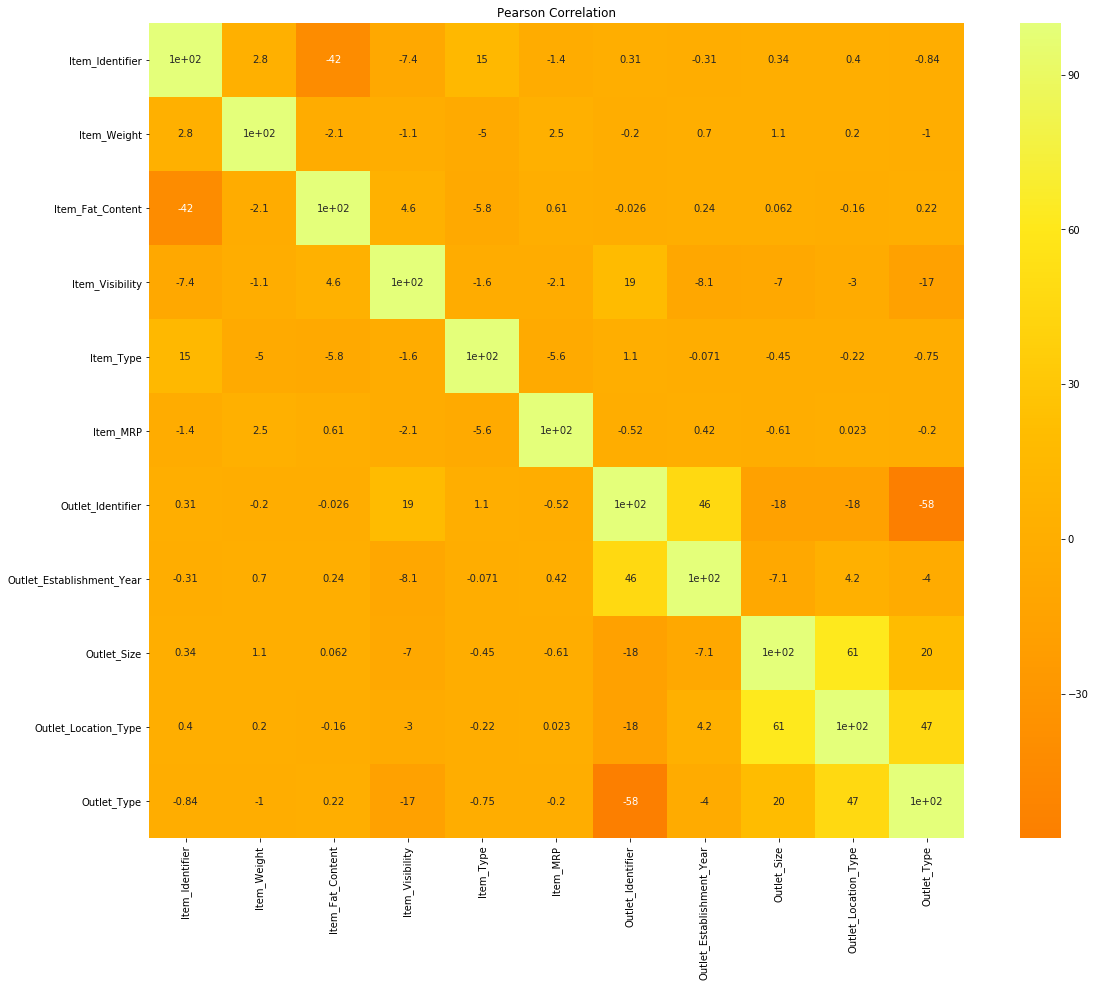

In [24]:
plt.figure(figsize=(20,15))
sns.heatmap(data_train.corr()*100, square=True, annot=True, cmap='Wistia_r')
plt.title('Pearson Correlation')

#### Normalising the data

In [25]:
from sklearn.preprocessing import StandardScaler

cols_t = data_train.columns
cols_v =data_test.columns
scaler = StandardScaler()

norm_df_t = scaler.fit_transform(data_train.values)
norm_df_v = scaler.fit_transform(data_test.values)

norm_df_t = pd.DataFrame(data=norm_df_t, columns=cols_t, index=data_train.index)
norm_df_v = pd.DataFrame(data=norm_df_v, columns=cols_v, index=data_test.index)
norm_df_t.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-0.593554,-0.831187,-0.738147,-0.517752,-0.115565,1.747454,-0.047374,0.076668,0.284581,-1.369334,-0.252658
1,0.672110,-1.630810,1.354743,-0.517752,0.949836,-1.489023,0.688765,1.541783,0.284581,1.091569,1.002972
2,-0.593554,1.108727,-0.738147,-0.517752,1.216187,0.010040,-0.047374,0.076668,0.284581,-1.369334,-0.252658
3,-0.593554,1.510904,1.354743,-0.517752,-1.180967,0.660050,1.424905,-0.289611,0.284581,1.091569,-1.508289
4,1.937774,-0.918719,-0.738147,-0.517752,-0.648266,-1.399220,-1.151584,-1.022168,1.950437,1.091569,-0.252658


In [26]:
norm_df_t

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-0.593554,-0.831187,-0.738147,-0.517752,-0.115565,1.747454,-0.047374,0.076668,0.284581,-1.369334,-0.252658
1,0.672110,-1.630810,1.354743,-0.517752,0.949836,-1.489023,0.688765,1.541783,0.284581,1.091569,1.002972
2,-0.593554,1.108727,-0.738147,-0.517752,1.216187,0.010040,-0.047374,0.076668,0.284581,-1.369334,-0.252658
3,-0.593554,1.510904,1.354743,-0.517752,-1.180967,0.660050,1.424905,-0.289611,0.284581,1.091569,-1.508289
4,1.937774,-0.918719,-0.738147,-0.517752,-0.648266,-1.399220,-1.151584,-1.022168,1.950437,1.091569,-0.252658
5,-0.593554,-0.572137,1.354743,-0.517752,0.417135,-1.438734,0.688765,1.541783,0.284581,1.091569,1.002972
6,-0.593554,0.197914,1.354743,-0.517752,-0.914617,-1.338238,-1.151584,-1.022168,1.950437,1.091569,-0.252658
7,-0.593554,-0.050490,-0.738147,1.607874,-0.914617,-0.533641,-1.519654,-1.388447,0.284581,1.091569,2.258603
8,-0.593554,0.801180,1.354743,-0.517752,-0.381916,-0.706908,0.320695,0.442947,0.284581,-0.138882,-0.252658
9,-0.593554,1.510904,1.354743,-0.517752,-0.381916,0.752008,1.056835,1.175504,0.284581,-0.138882,-0.252658


### Creating train and test data 

In [27]:
train=norm_df_t
test=norm_df_v

In [28]:
train.shape

(8523, 11)

In [29]:
test.shape

(5681, 11)

In [30]:
#log_target=np.log1p(target)

Text(0.5, 1.0, 'Log. Item Outlet Sales')

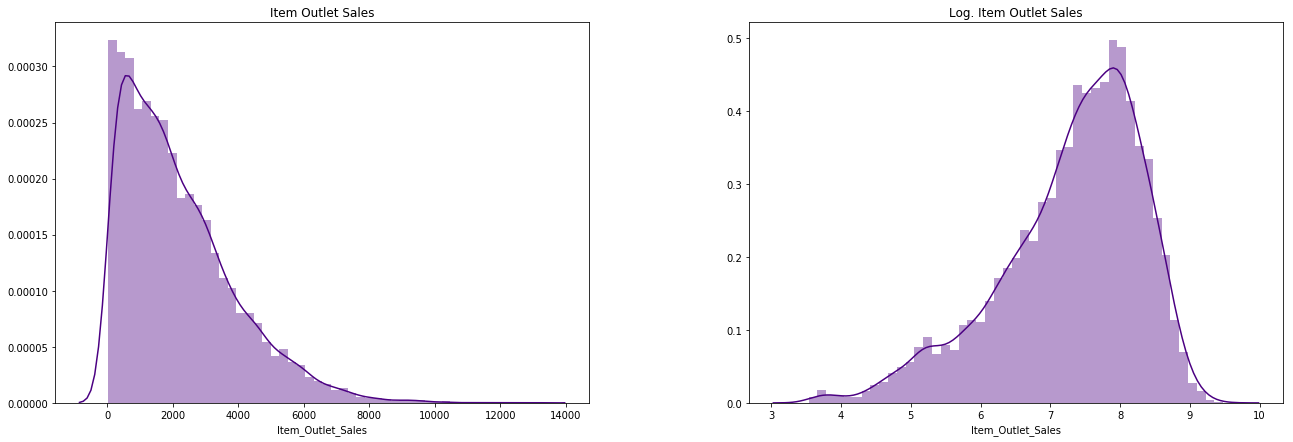

In [31]:
plt.figure(figsize=(22,7))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

plt.subplot(1,2,1)
sns.distplot(target, color='indigo')
plt.title('Item Outlet Sales')

plt.subplot(1,2,2)
log_target = np.log1p(target)
sns.distplot(log_target, color='indigo')
plt.title('Log. Item Outlet Sales')

In [32]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_log_error , mean_squared_error

x = train
y = log_target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6818, 11), (1705, 11), (6818,), (1705,))

### Model Implementation

#### linear regression model

In [34]:

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
lr_pred

array([8.23800291, 7.26657355, 7.75828555, ..., 6.67553307, 7.88972359,
       7.66166037])

In [ ]:
def mape(y_true,y_pred):
    mape=np.mean(np.abs((y_true-y_pred)/y_true))*100
    return mape

In [35]:
print ("Training Score : " , lr.score(x_train, y_train))
print ("Validation Score : ", lr.score(x_test, y_test))
print ("Cross Validation Score : " , cross_val_score(lr, x_train, y_train, cv=5).mean())
print ("R2_Score : ", r2_score(lr_pred, y_test))
print("MAPE output: %f" % mape(y_test,lr_pred))

Training Score :  0.6952720126422746
Validation Score :  0.694894141104267
Cross Validation Score :  0.6934739186933732
R2_Score :  0.5709561243806104


NameError: name 'mape' is not defined

##### Visualisation of predicted values

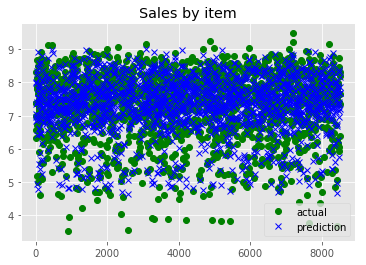

In [36]:
predict = lr.predict(x_test)
predictions = pd.Series(predict, index = y_test.index.values)

plt.style.use('ggplot')
plt.figure(1)

plt.plot(y_test,'go', label='actual')
plt.plot(predictions,'bx', label='prediction')

plt.title('Sales by item')

plt.legend(loc='best')

plt.show()

##### SVR model implementation

In [37]:
svr=SVR()
svr.fit(x_train,y_train)

C:\Users\Vikash Singh\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [39]:
svr_p = svr.predict(x_test)


score_svr = r2_score(y_test, svr_p)
rmse_svr = np.sqrt(mean_squared_error(y_test, svr_p))

print("R^2_Score SVR: %f" % score_svr)
print("RMSE SVR: %f" % rmse_svr)
print("MAPE output: %f" % mape(y_test,svr_p))

R^2_Score SVR: 0.725618
RMSE SVR: 0.533375
MAPE output: 5.936216


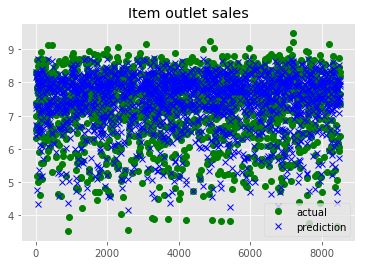

In [40]:
predict = svr.predict(x_test)
predictions = pd.Series(predict, index = y_test.index.values)

plt.style.use('ggplot')
plt.figure(1)

plt.plot(y_test,'go', label='actual')
plt.plot(predictions,'bx', label='prediction')

plt.title('Item outlet sales')


plt.legend(loc='best')

plt.show()

C:\Users\Vikash Singh\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0.5, 1.0, 'Test VS Prediction')

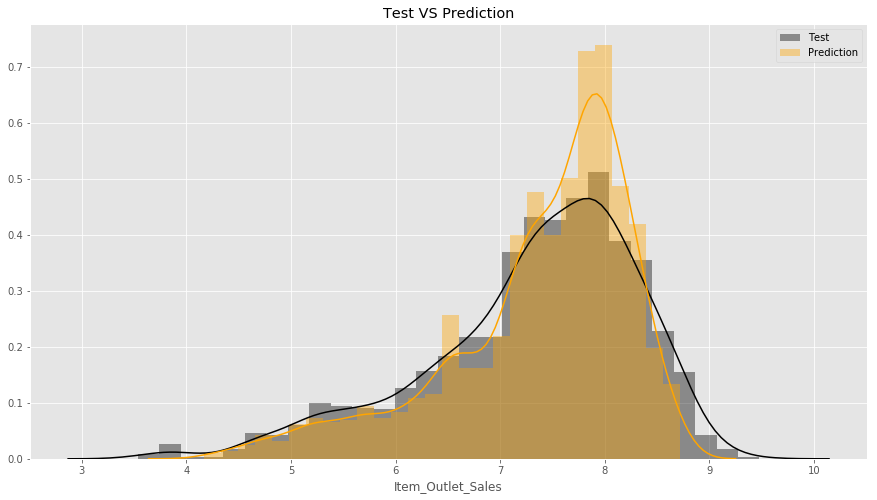

In [41]:
plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=True, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(predict, kde=True, color="orange", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

In [ ]:
# Tuning Support Vector Regression with GridSearch

tuned_parameters = [{'C': [1000, 3000, 10000], 
                     'kernel': ['linear', 'rbf']}
                   ]

svr_tuned = GridSearchCV(SVR (C=1), param_grid = tuned_parameters, scoring = 'mean_squared_error') #default 3-fold cross-validation, score method of the estimator
#svr_tuned_GS = GridSearchCV(SVR (C=1), param_grid = tuned_parameters, scoring = 'r2', n_jobs=-1) #default 3-fold cross-validation, score method of the estimator

svr_tuned_GS.fit(x_train, y_train)

print (svr_tuned_GS)
print ('\n' "Best parameter from grid search: " + str(svr_tuned_GS.best_params_) +'\n')

In [ ]:
svr_p_t = svr_tuned_GS.predict(x_test)
score_svr_t = r2_score(y_test, svr_p_t)
rmse_svr_t = np.sqrt(mean_squared_error(y_test, svr_p_t))

print("R^2_Score SVR: %f" % score_svr_t)
print("RMSE SVR: %f" % rmse_svr_t)
print("MAPE output: %f" % mape(y_test,svr_p_t))

In [ ]:
predict_t_GS = svr_tuned_GS.predict(x_test)
predictions = pd.Series(predict, index = y_test.index.values)

plt.style.use('ggplot')
plt.figure(1)

plt.plot(y_test,'go', label='actual')
plt.plot(predictions,'bx', label='prediction')

plt.title('Item outlet sales')


plt.legend(loc='best')

plt.show()

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=True, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(predict_t_GS, kde=True, color="orange", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

#### Applying SVR to the test data

In [124]:
test_id = pd.read_csv('C:/Users/Vikash Singh/Desktop/avance assignment/Test_Retail.csv', header=0)['Item_Identifier']

final_pred = np.expm1(svr.predict(test))# we have used log for normal distribution of target variable so here we converted to original form

In [125]:
final_pred = pd.DataFrame({'Item_Identifier':test_id.values, 'Item_Outlet_Sales':final_pred})

In [126]:
final_pred

,Item_Identifier,Item_Outlet_Sales
0,FDW58,1511.500904
1,FDW14,1366.002718
2,NCN55,801.850065
3,FDQ58,2264.933065
4,FDY38,5328.921362
5,FDH56,1888.092983
6,FDL48,728.471067
7,FDC48,1852.206063
8,FDN33,1286.347079
9,FDA36,2803.329385


In [127]:
final_data = final_pred.to_csv('C:/Users/Vikash Singh/Desktop/avance assignment/Final_Sub.csv')

### Improvement

##### Improvement can be done on increasing R2_score, and other metrics using different algorithms such as Neural Networks, Xtreme Gradient Boosting etc